In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("../ising_times_clean_python.csv")

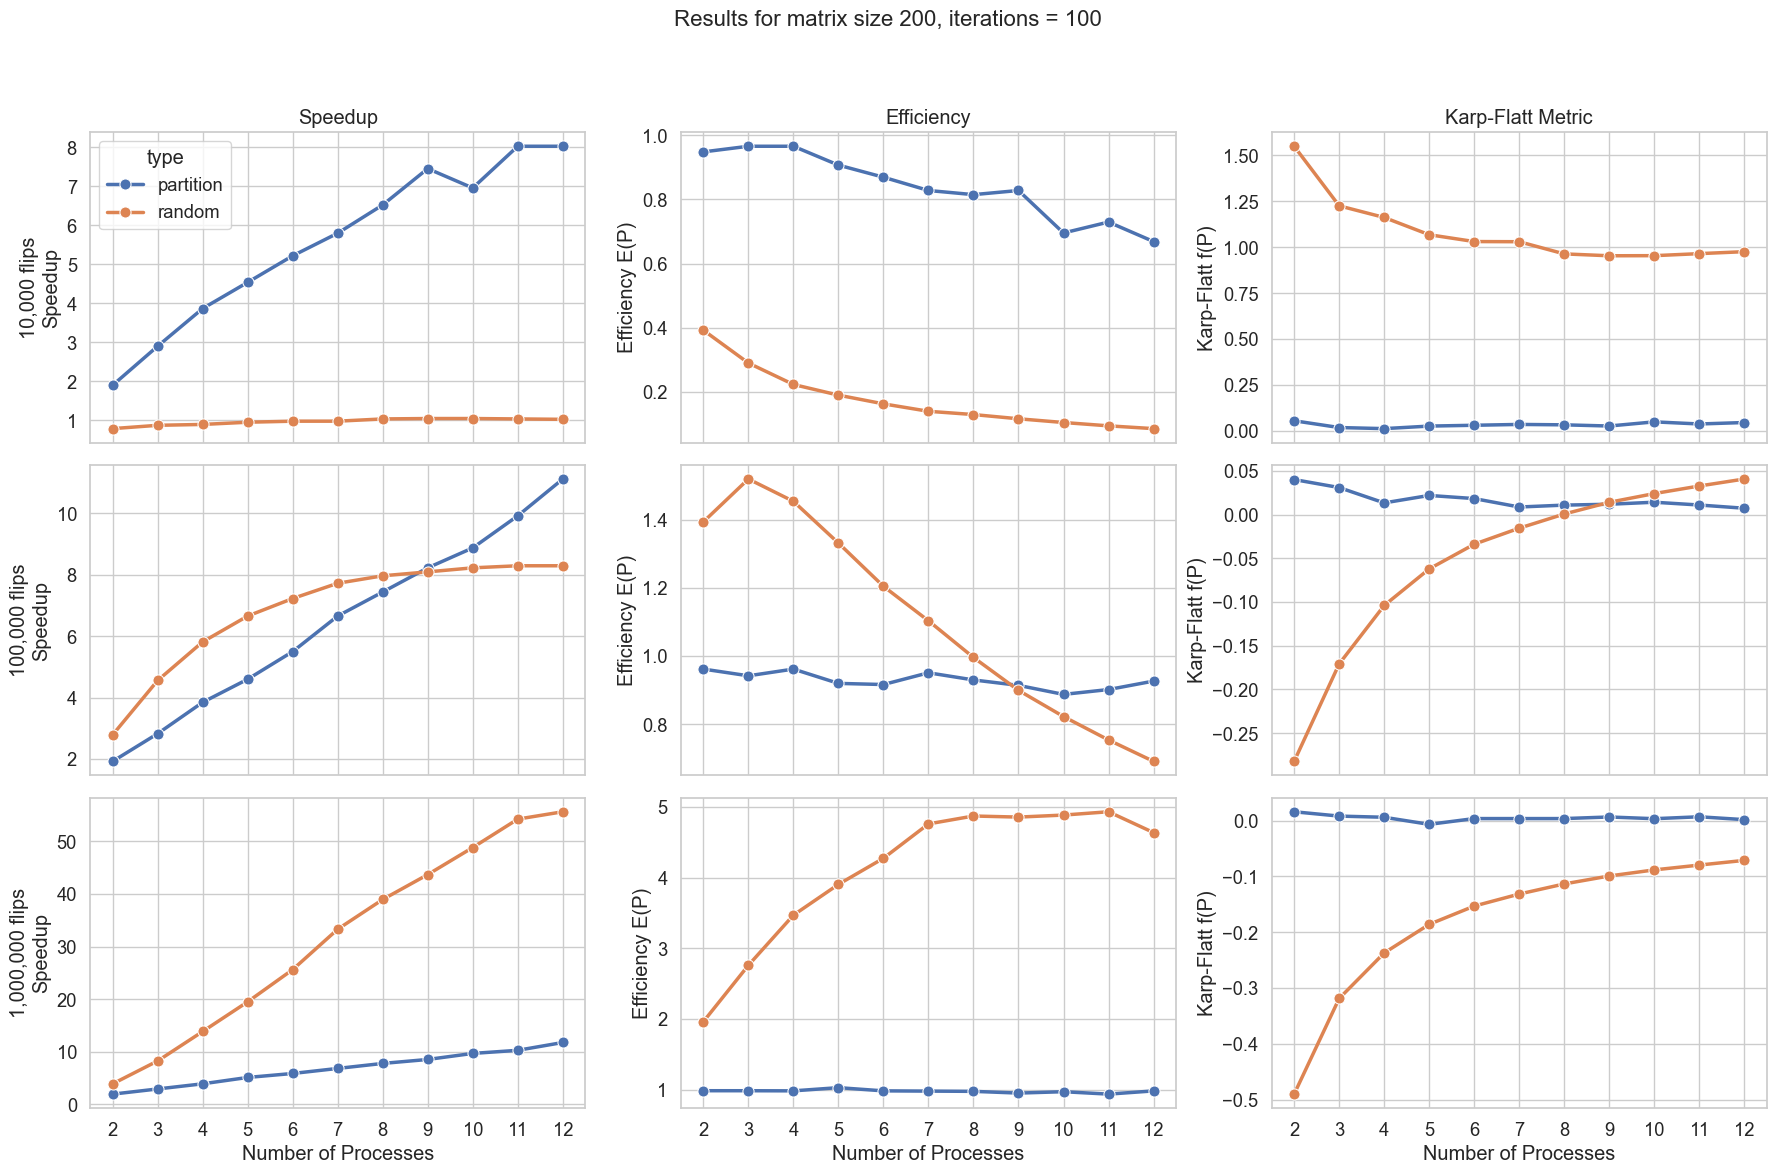

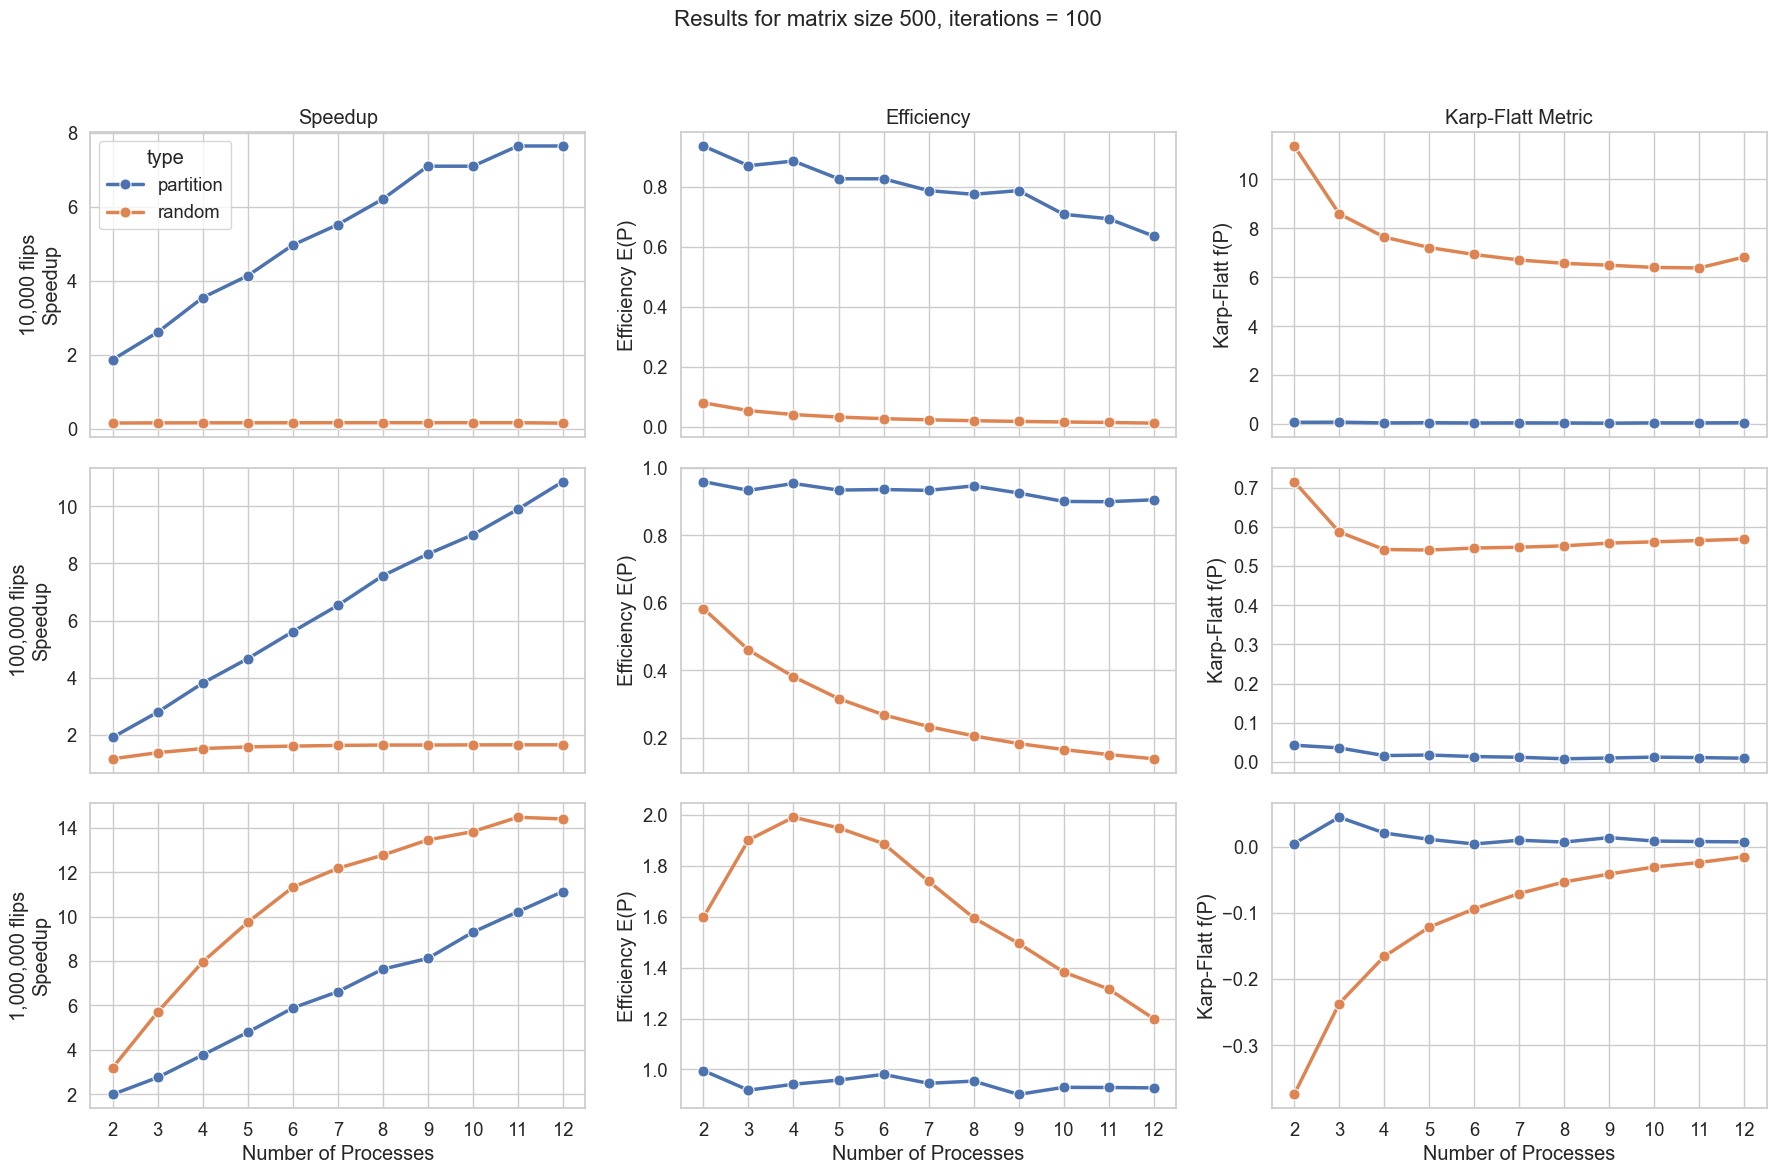

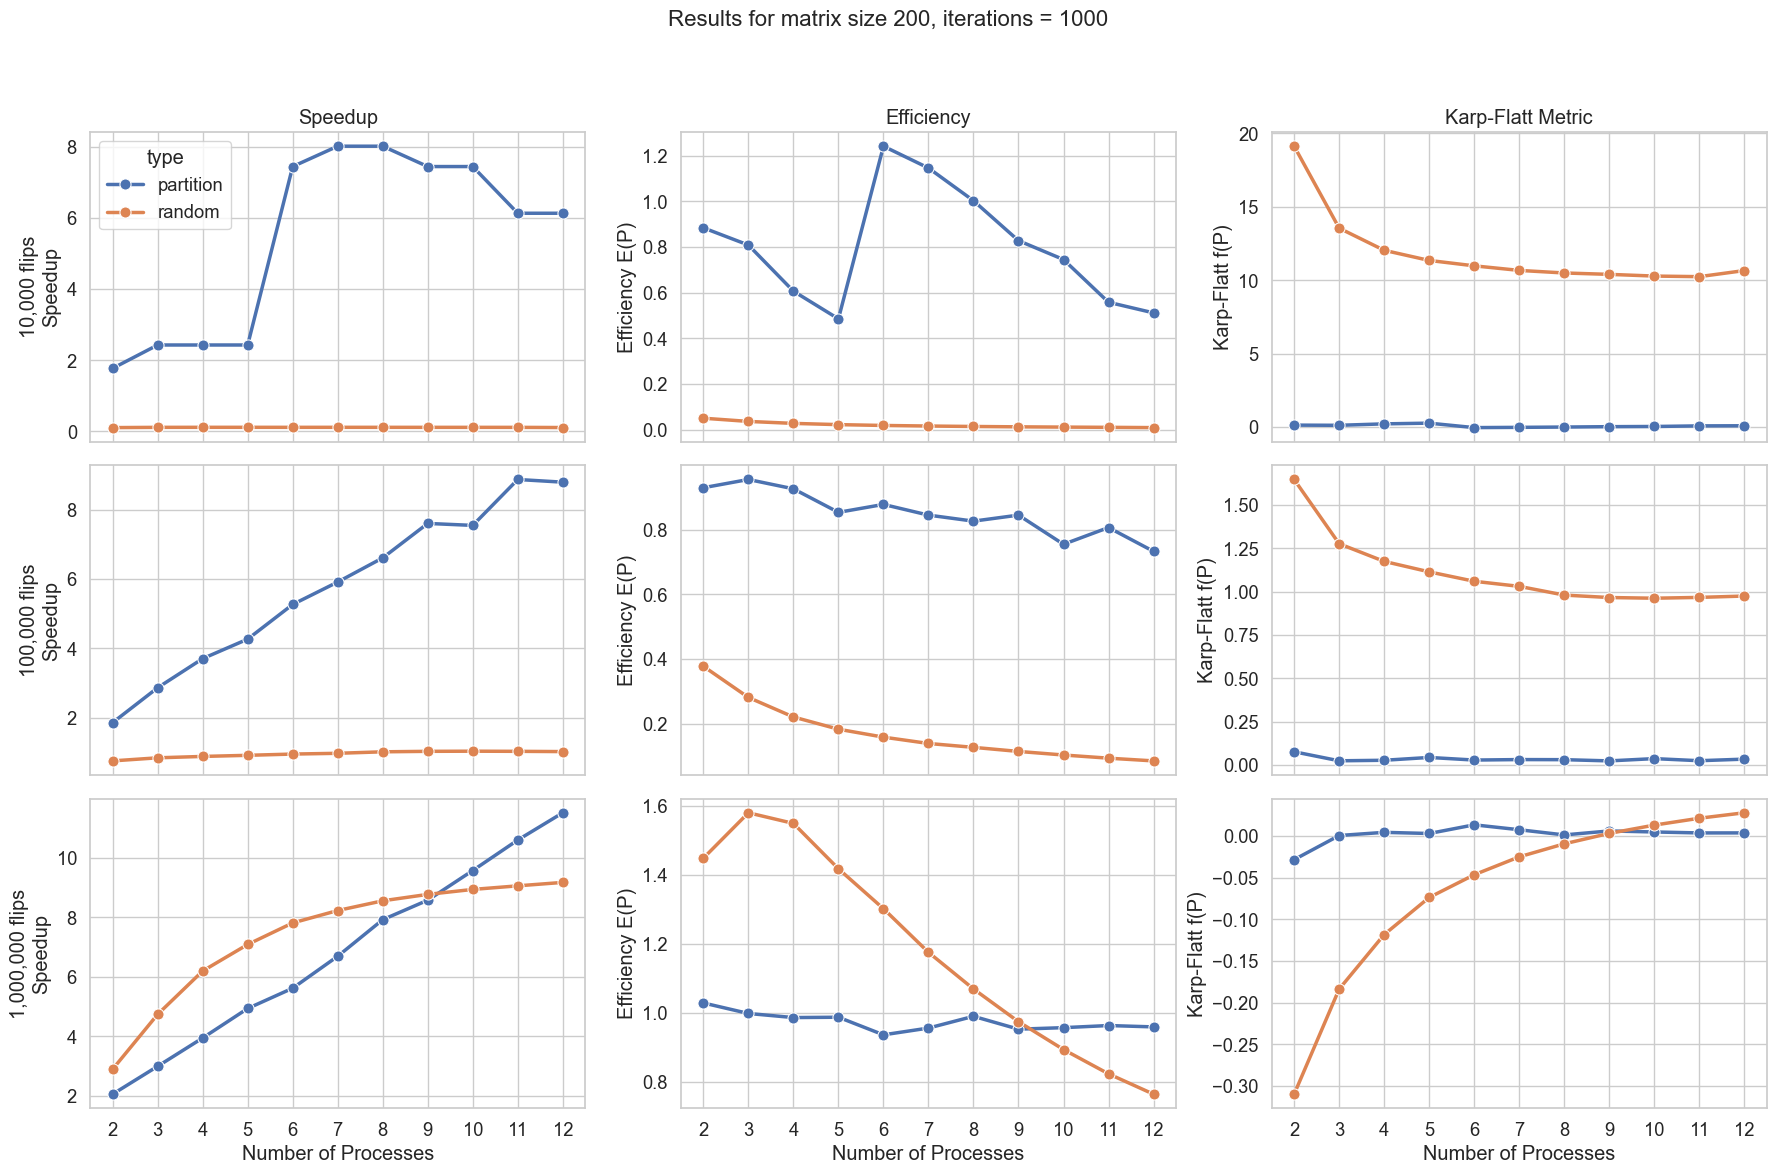

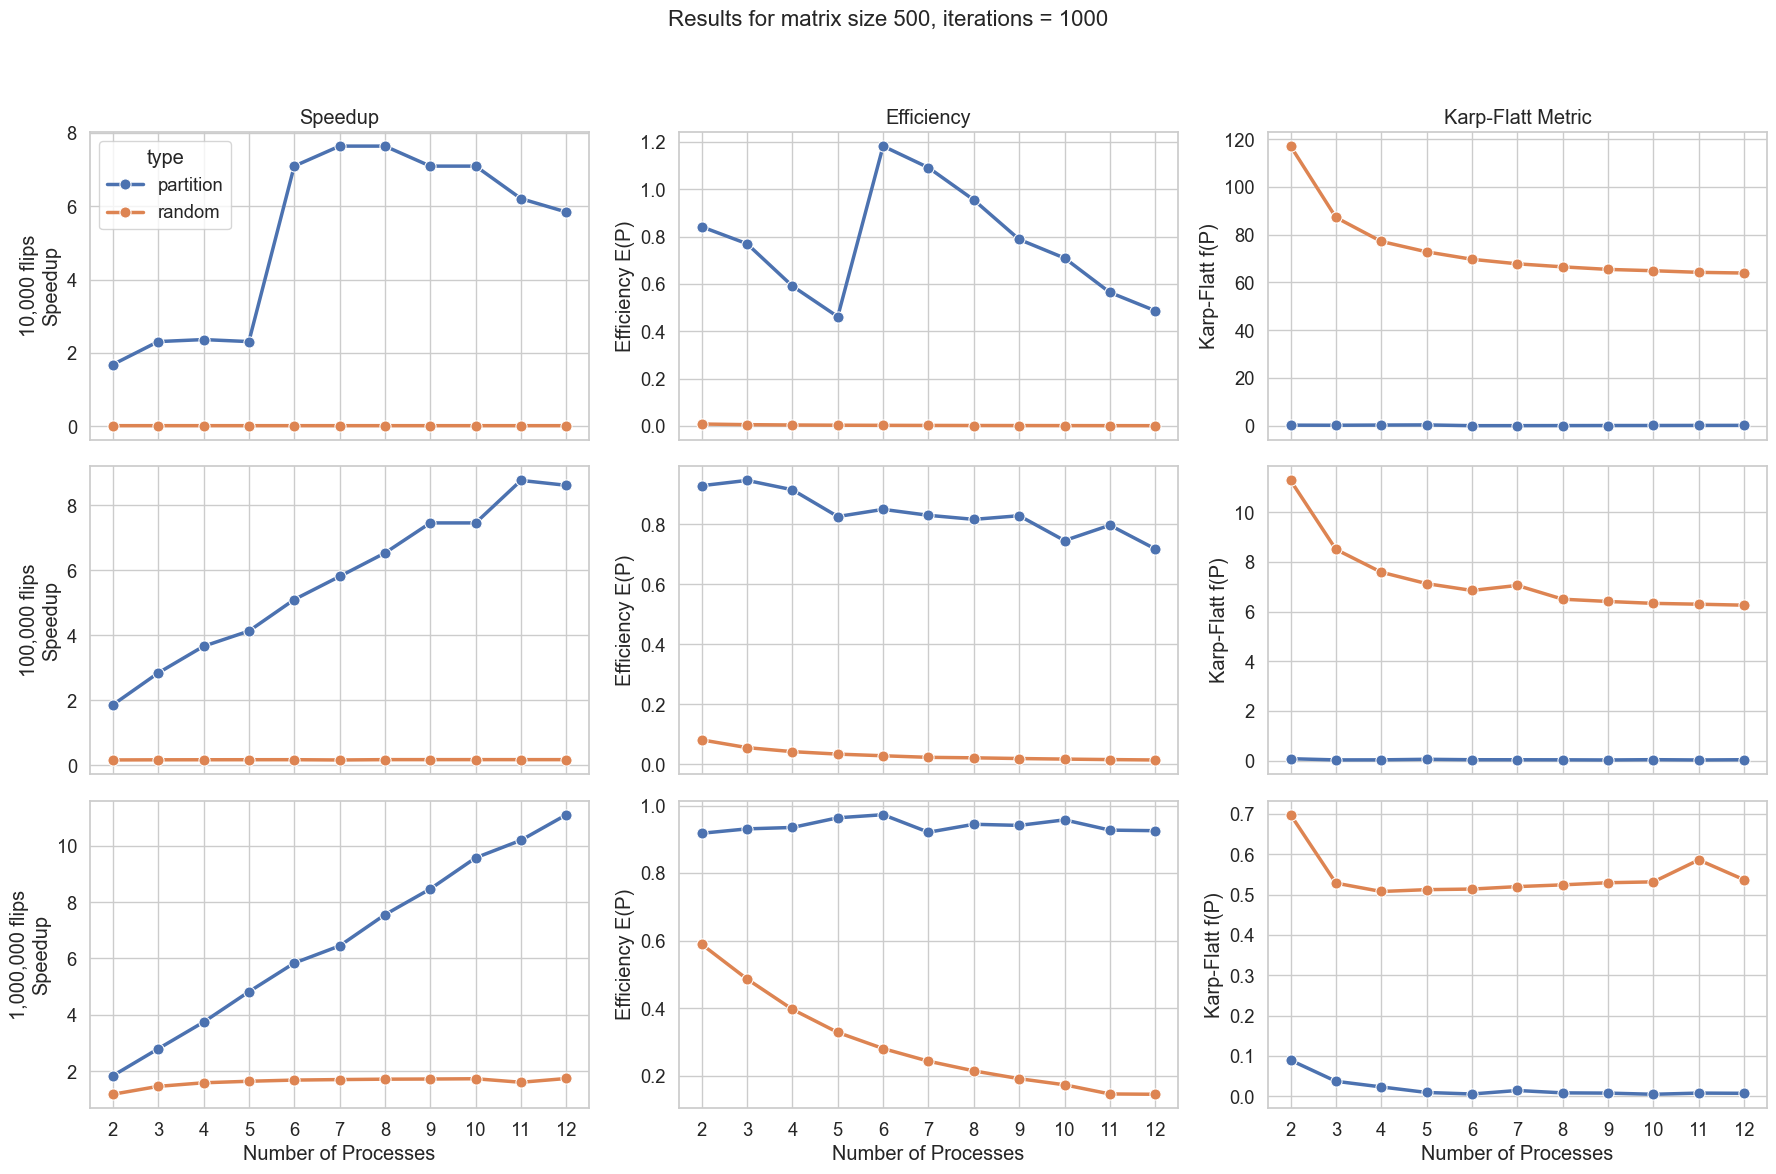

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def plot_line(rest: pd.DataFrame, y: str, y_label: str, ax):
    sns.lineplot(
        data=rest,
        x="nproc",
        y=y,
        marker="o",
        linewidth=2.5,
        markersize=8,
        ax=ax,
        hue="type",
        legend=ax is axes[0, 0]  # show legend only once
    )
    ax.set_ylabel(y_label)
    ax.set_xlabel("Number of Processes")
    ax.set_xticks(rest["nproc"].unique())


grid_sizes = [200, 500]
total_flips = [10000, 100000, 1000000]

sns.set_theme(style="whitegrid", font_scale=1.2)

for iters in [100, 1000]:
    for grid_size in grid_sizes:

        fig, axes = plt.subplots(3, 3, figsize=(18, 12), sharex=True)
        fig.suptitle(
            f"Results for matrix size {grid_size}, iterations = {iters}",
            fontsize=16
        )

        for row, flip_count in enumerate(total_flips):

            per_proc_time = df[
                (df["grid_size"] == grid_size)
                & (df["total_flips"] == flip_count)
                & ((df["iters"] == iters) | (df["iters"] == 1))
            ]

            one_proc = per_proc_time["nproc"] == 1
            base_time = per_proc_time.loc[one_proc, "time_sec"].iloc[0]

            rest = per_proc_time.loc[~one_proc].copy()
            rest["SP"] = base_time / rest["time_sec"]
            rest["EP"] = rest["SP"] / rest["nproc"]
            rest["fp"] = (1 / rest["SP"] - 1 / rest["nproc"]) / (1 - 1 / rest["nproc"])

            plot_line(rest, "SP", "Speedup S(P)", axes[row, 0])
            plot_line(rest, "EP", "Efficiency E(P)", axes[row, 1])
            plot_line(rest, "fp", "Karp-Flatt f(P)", axes[row, 2])

            # Row label (flip count)
            axes[row, 0].set_ylabel(f"{flip_count:,} flips\nSpeedup")

        # Column titles
        axes[0, 0].set_title("Speedup")
        axes[0, 1].set_title("Efficiency")
        axes[0, 2].set_title("Karp-Flatt Metric")

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


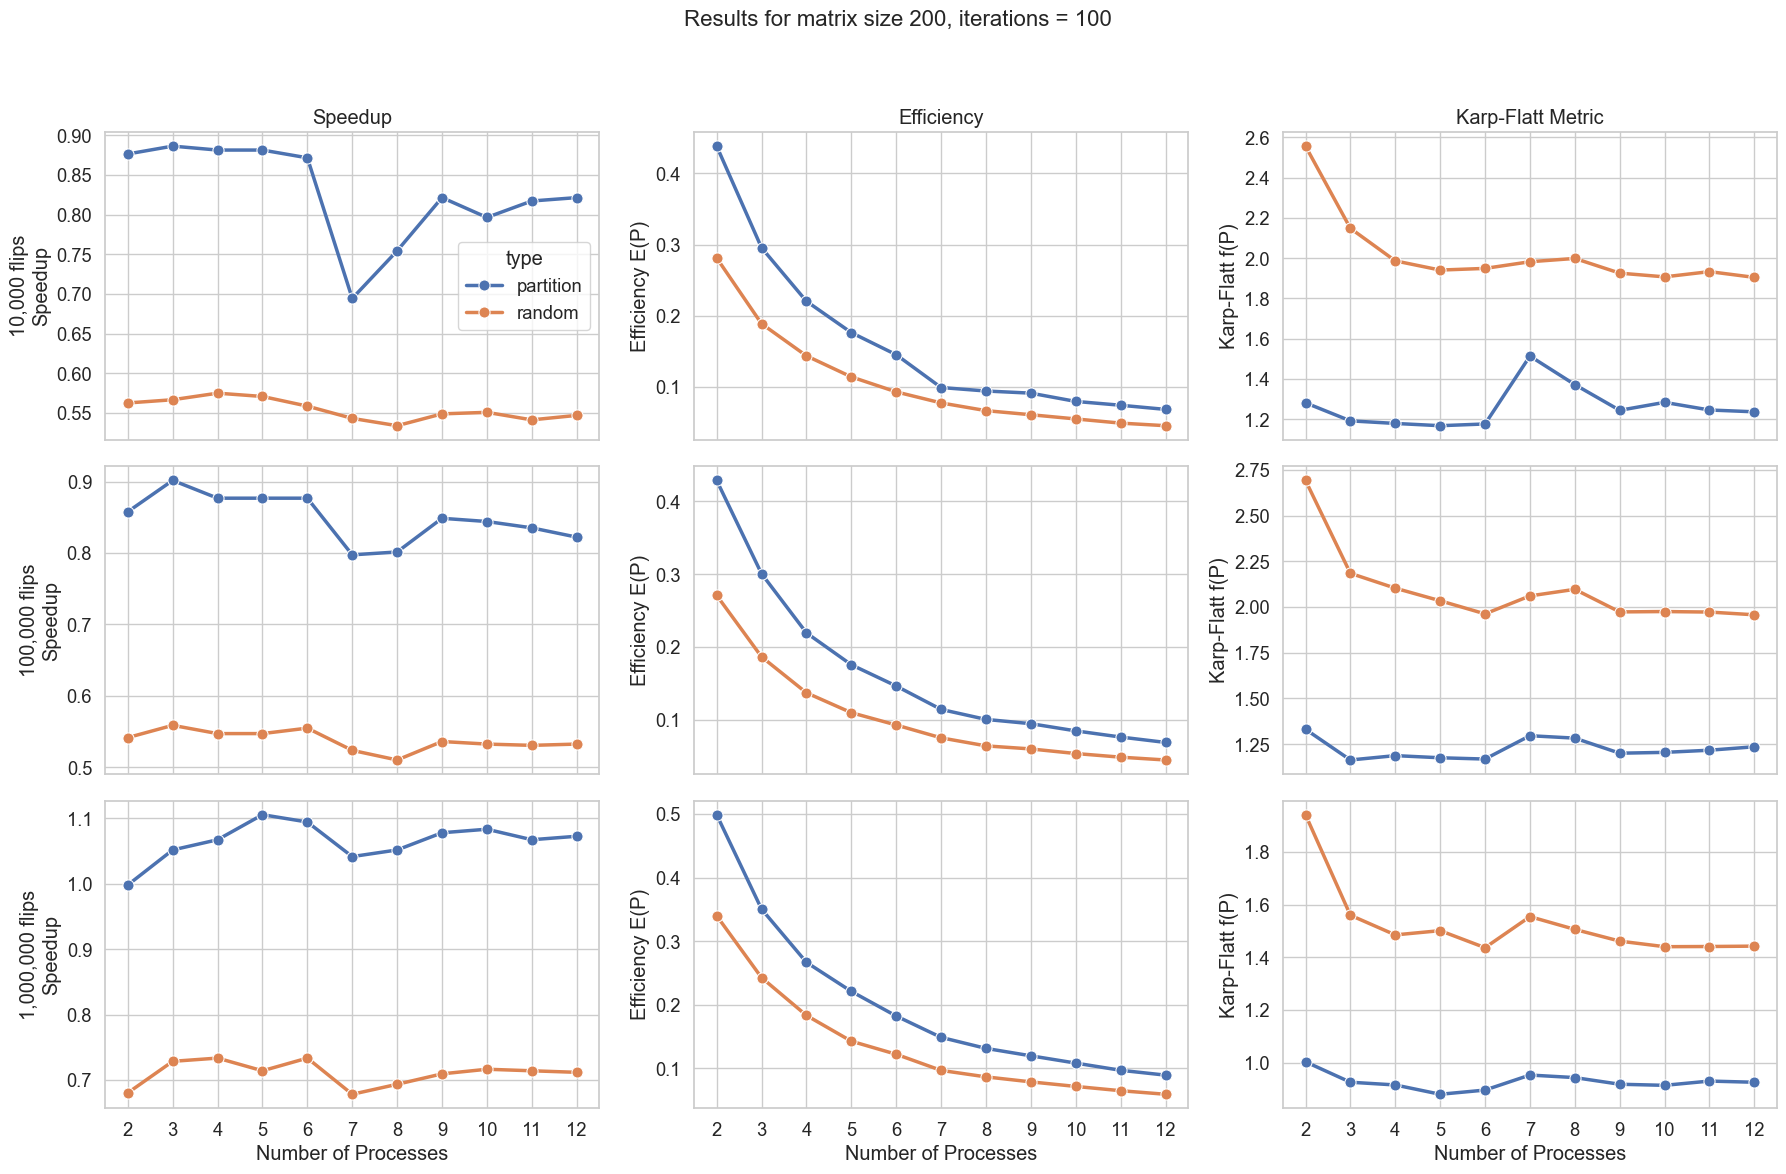

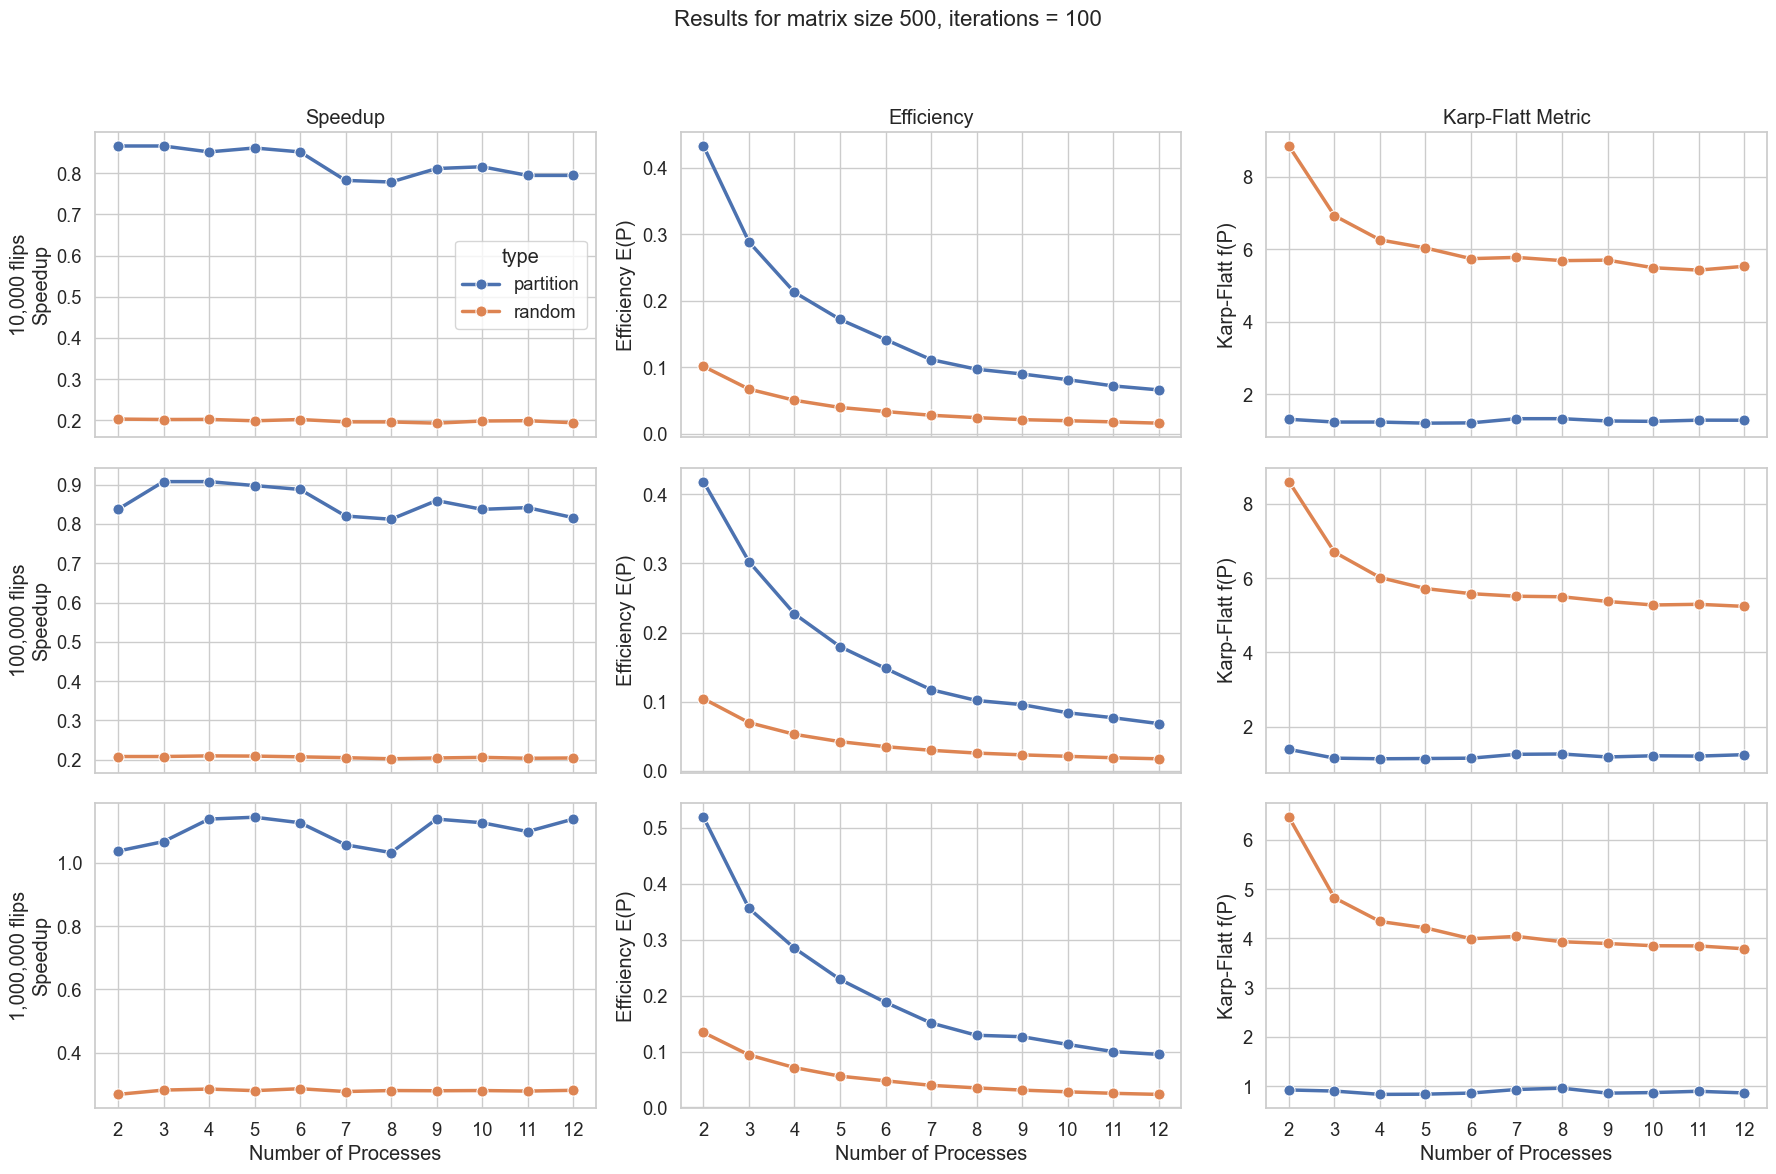

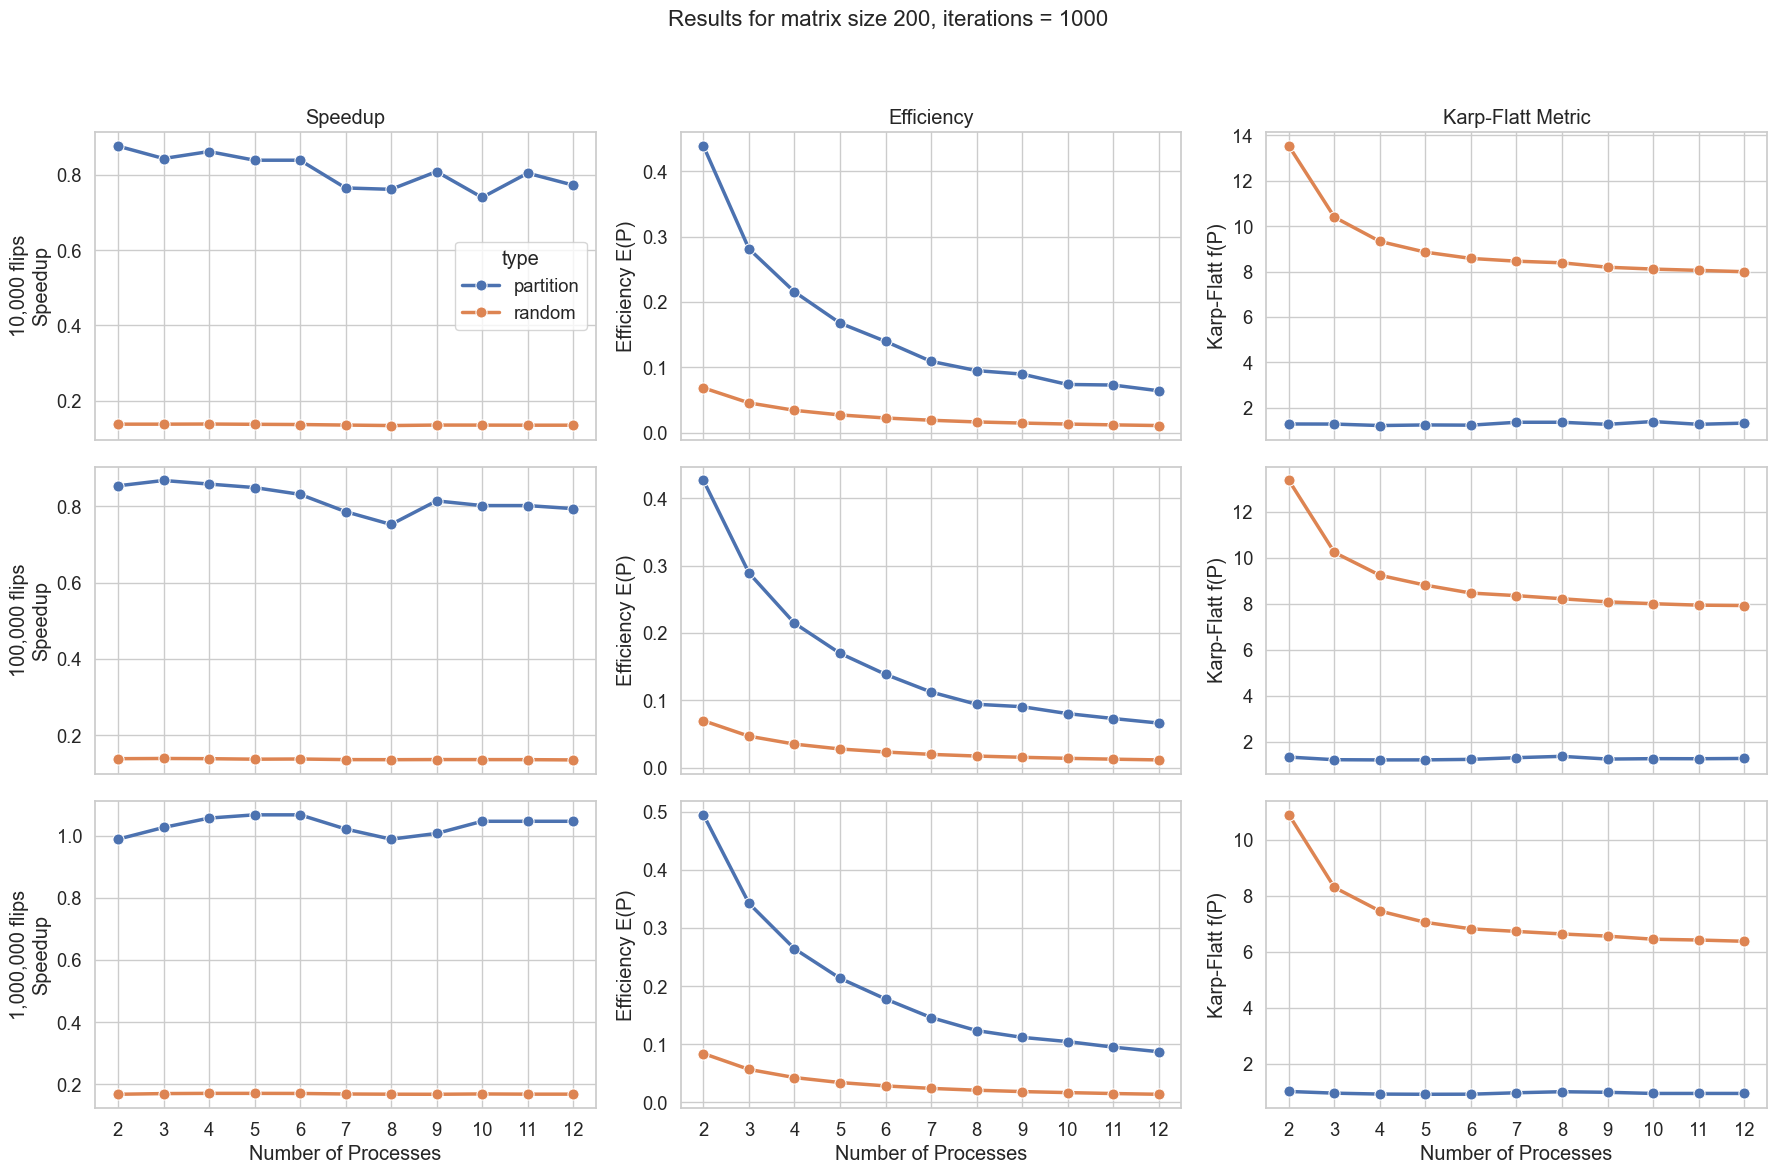

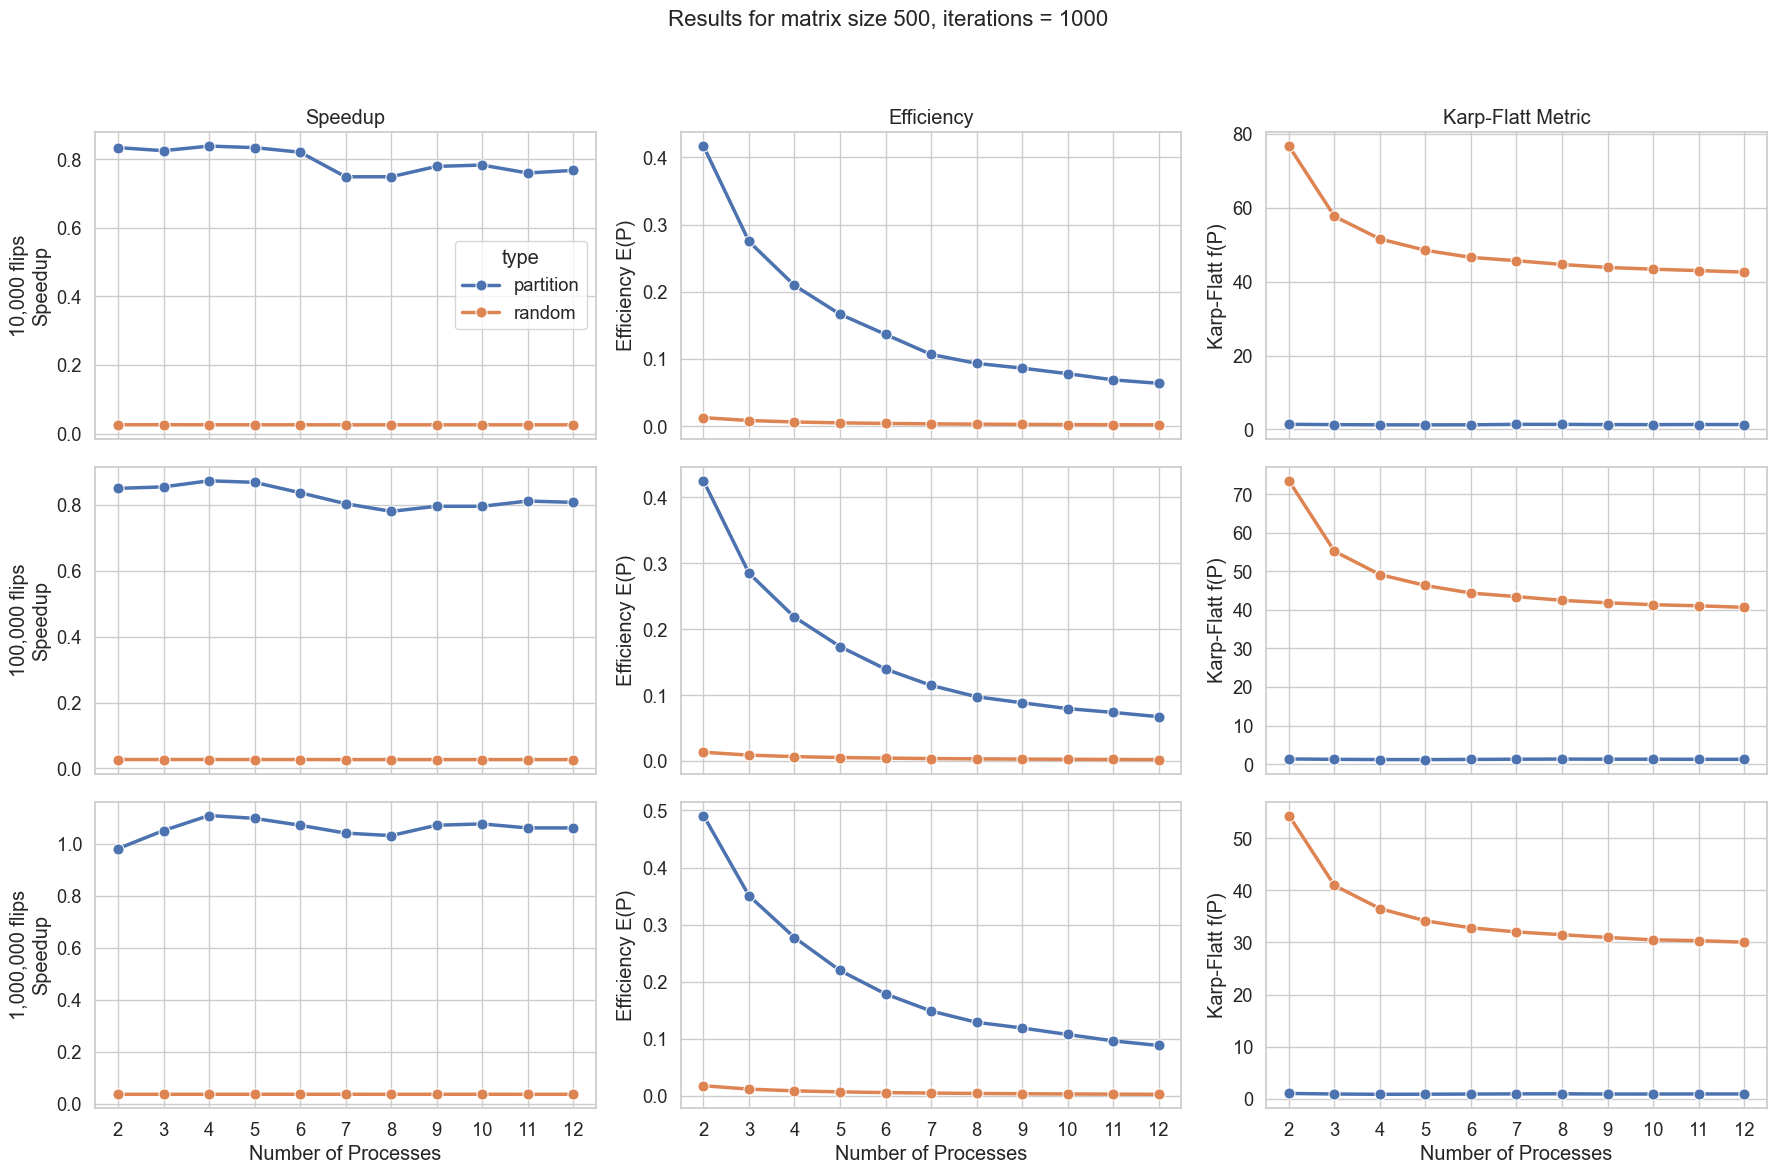

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv("../ising_times_numba.csv")


sns.set_theme(style="whitegrid", font_scale=1.2)

for iters in [100, 1000]:
    for grid_size in grid_sizes:

        fig, axes = plt.subplots(3, 3, figsize=(18, 12), sharex=True)
        fig.suptitle(
            f"Results for matrix size {grid_size}, iterations = {iters}",
            fontsize=16
        )

        for row, flip_count in enumerate(total_flips):

            per_proc_time = df[
                (df["grid_size"] == grid_size)
                & (df["total_flips"] == flip_count)
                & ((df["iters"] == iters) | (df["iters"] == 1))
            ]

            one_proc = per_proc_time["nproc"] == 1
            base_time = per_proc_time.loc[one_proc, "time_sec"].iloc[0]

            rest = per_proc_time.loc[~one_proc].copy()
            rest["SP"] = base_time / rest["time_sec"]
            rest["EP"] = rest["SP"] / rest["nproc"]
            rest["fp"] = (1 / rest["SP"] - 1 / rest["nproc"]) / (1 - 1 / rest["nproc"])

            plot_line(rest, "SP", "Speedup S(P)", axes[row, 0])
            plot_line(rest, "EP", "Efficiency E(P)", axes[row, 1])
            plot_line(rest, "fp", "Karp-Flatt f(P)", axes[row, 2])

            # Row label (flip count)
            axes[row, 0].set_ylabel(f"{flip_count:,} flips\nSpeedup")

        # Column titles
        axes[0, 0].set_title("Speedup")
        axes[0, 1].set_title("Efficiency")
        axes[0, 2].set_title("Karp-Flatt Metric")

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
